Total sample size N = 4000; 3000 with Y=0 and 1000 with Y=1. Y is the target variable.  
There are three clinical variables, X1, X2 and X3. Every Xi is dichotomous ({0,1}).  
Determine a fraction vector for 16 combinatorial stata.
Generate N samples' data records for Y and X1, X2 and X3.
Report the codes in python.  
Hint:  
Make a bifurcation tree with 16 leaf nodes.
The top root has one node and it divides into to two nodes then 4 nodes appear and then 8 then 16.
Give values to all nodes (1 + 2 + 4 + 8 + 16 = 31 nodes). The top node's value should be 1.
The sum of values of each layer should be 1. The sum of two nodes should correspond to the node from which they are produced.
The ratio of two values of each bifurcation should be away from evenness, that means the bifurcating variable is informative.

y: answer (0 or 1)  
x1,x2,x3: feature (いずれも0 or 1)

In [2]:
y_n = 2 # yのカテゴリー数
x1_n = 2 # x1のカテゴリー数
x2_n = 2 # x2のカテゴリー数
x3_n = 2 # x3のカテゴリー数

In [3]:
n = 4000 #総人数

# conditional probabilityを設定。
# cp_**** は、順にy,x1,x2,x3のbinary値を記載

cp_01 = 0.3  # y:0の時、x1:1になる確率
cp_11 = 0.9 # y:1の時、x1:1になる確率

cp_001 = 0.2 # y:0およびx1:0の時、x2:1になる確率
cp_011 = 0.1 # y:0およびx1:1の時、x2:1になる確率
cp_101 = 0.5 # y:1およびx1:0の時、x2:1になる確率
cp_111 = 0.8 # y:1およびx1:1の時、x2:1になる確率

cp_0001 = 0.05# y:0およびx1:0およびx2:0の時、x3:1になる確率
cp_0011 = 0.2 # y:0およびx1:0およびx2:1の時、x3:1になる確率
cp_0101 = 0.1 # y:0およびx1:1およびx2:0の時、x3:1になる確率
cp_0111 = 0   # y:0およびx1:1およびx2:1の時、x3:1になる確率
cp_1001 = 0.6 # y:1およびx1:0およびx2:0の時、x3:1になる確率
cp_1011 = 0.7 # y:1およびx1:0およびx2:1の時、x3:1になる確率
cp_1101 = 0.5 # y:1およびx1:1およびx2:0の時、x3:1になる確率
cp_1111 = 0.8 # y:1およびx1:1およびx2:1の時、x3:1になる確率

In [4]:
#　x*が1になる確率aを入れると、{0,1}に対応する確率分布[1-a,a]（リスト型）を返す関数を作成
def ml(a): 
    return [1-a,a]

In [5]:
import numpy as np
from numpy import random

In [6]:
# yを作成
y = np.zeros(4000).astype('int64')
y[:1000]=1
random.seed(0)
random.shuffle(y)

In [7]:
#yに基づいてx1を作成

"""
cpro_01 = 0.3  # y:0の時、x1:1になる確率
cpro_11 = 0.95 # y:1の時、x1:1になる確率
"""

x1=np.zeros(n)

random.seed(1)
for i in range(n):
    if y[i]==0:
        x1[i]=random.choice(x1_n, p=ml(cp_01))
    else:
        x1[i]=random.choice(x1_n, p=ml(cp_11))

x1=x1.astype('int64')       

In [8]:
# yとx1に基づいてx2を作成

"""
cpro_001 = 0.2 # y:0およびx1:0の時、x2:1になる確率
cpro_011 = 0.1 # y:0およびx1:1の時、x2:1になる確率
cpro_101 = 0.5 # y:1およびx1:0の時、x2:1になる確率
cpro_111 = 0.7 # y:1およびx1:1の時、x2:1になる確率
"""

x2=np.zeros(n)

random.seed(2)
for i in range(n): 
    if y[i]==0 and x1[i]==0:
        x2[i]=random.choice(x2_n, p=ml(cp_001))
    elif y[i]==0 and x1[i]==1:
        x2[i]=random.choice(x2_n, p=ml(cp_011))
    elif y[i]==1 and x1[i]==0:
        x2[i]=random.choice(x2_n, p=ml(cp_101))
    elif y[i]==1 and x1[i]==1:
        x2[i]=random.choice(x2_n, p=ml(cp_111))

x2=x2.astype('int64')

In [9]:
# yとx1とx2に基づいてx3を作成

"""
cpro_0001 = 0.05# y:0およびx1:0およびx2:0の時、x3:1になる確率
cpro_0011 = 0.2 # y:0およびx1:0およびx2:1の時、x3:1になる確率
cpro_0101 = 0.1 # y:0およびx1:1およびx2:0の時、x3:1になる確率
cpro_0111 = 0   # y:0およびx1:1およびx2:1の時、x3:1になる確率
cpro_1001 = 0.6 # y:1およびx1:0およびx2:0の時、x3:1になる確率
cpro_1011 = 0.7 # y:1およびx1:0およびx2:1の時、x3:1になる確率
cpro_1101 = 0.5 # y:1およびx1:1およびx2:0の時、x3:1になる確率
cpro_1111 = 0.9 # y:1およびx1:1およびx2:1の時、x3:1になる確率
"""

x3=np.zeros(n)

random.seed(3)

for i in range(n): 
    if y[i]==0 and x1[i]==0 and x2[i]==0:
        x3[i]=random.choice(x3_n, p=ml(cp_0001))
    elif y[i]==0 and x1[i]==0 and x2[i]==1:
        x3[i]=random.choice(x3_n, p=ml(cp_0011))
    elif y[i]==0 and x1[i]==1 and x2[i]==0:
        x3[i]=random.choice(x3_n, p=ml(cp_0101))
    elif y[i]==0 and x1[i]==1 and x2[i]==1:
        x3[i]=random.choice(x3_n, p=ml(cp_0111))
    elif y[i]==1 and x1[i]==0 and x2[i]==0:
        x3[i]=random.choice(x3_n, p=ml(cp_1001))       
    elif y[i]==1 and x1[i]==0 and x2[i]==1:
        x3[i]=random.choice(x3_n, p=ml(cp_1011))
    elif y[i]==1 and x1[i]==1 and x2[i]==0:
        x3[i]=random.choice(x3_n, p=ml(cp_1101))
    elif y[i]==1 and x1[i]==1 and x2[i]==1:
        x3[i]=random.choice(x3_n, p=ml(cp_1111))

x3=x3.astype('int64')

In [10]:
import pandas as pd
data = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3})
answer = pd.DataFrame({"y":y})

In [11]:
print(np.sum(x1))
print(np.sum(x2))
print(np.sum(x3))
print(np.sum(y))

1800
1289
978
1000


In [12]:
data.head(20)

,x1,x2,x3
0,0,0,0
1,1,0,1
2,0,0,0
3,0,0,0
4,1,1,1
5,0,0,1
6,0,0,0
7,1,1,1
8,0,0,0
9,0,0,0


In [13]:
from sklearn import tree
clf = tree.DecisionTreeClassifier().fit(data,answer)

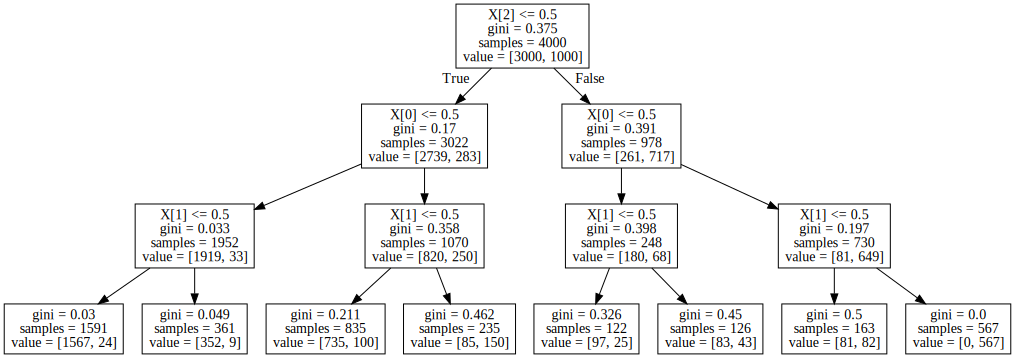

In [14]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [20]:
total = pd.DataFrame({"x1":x1,"x2":x2,"x3":x3,"y":y})

In [21]:
# conditional probabilityに基づいて作成したn=4000のData
total

,x1,x2,x3,y
0,0,0,0,0
1,1,0,1,1
2,0,0,0,0
3,0,0,0,0
4,1,1,1,1
5,0,0,1,1
6,0,0,0,0
7,1,1,1,1
8,0,0,0,0
9,0,0,0,0
